------------------------------
实验二数据处理结果 (Python 最小二乘法)
------------------------------
拟合方程: R = 0.01799 * t + 4.24848
相关系数 (r^2): 0.99872 (越接近1线性度越好)
拟合得到的 R0: 4.24848 (10^-3 Omega)
计算得到的电阻温度系数 alpha: 0.004234 /°C
理论值 alpha: 0.004330 /°C
相对误差: 2.22%
------------------------------


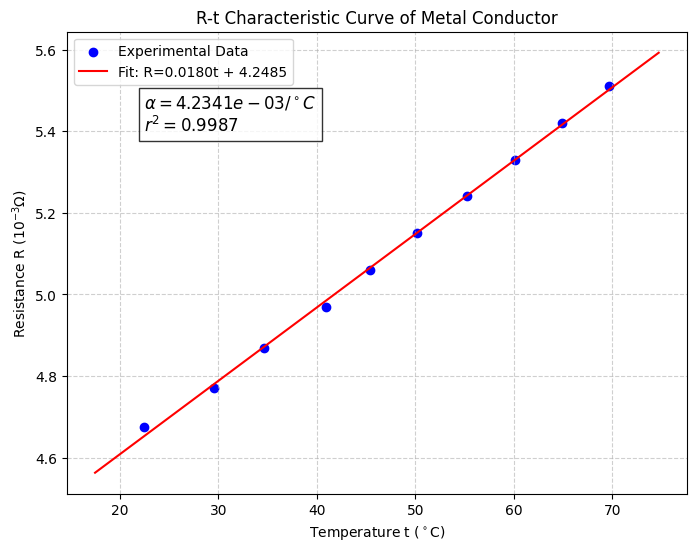

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. 输入实验数据
# 温度 t (摄氏度)
t = np.array([22.5, 29.6, 34.6, 40.9, 45.4, 50.2, 55.2, 60.1, 64.9, 69.7])
# 电阻 R (10^-3 欧姆)
R = np.array([4.675, 4.770, 4.870, 4.970, 5.060, 5.150, 5.240, 5.330, 5.420, 5.510])

# 2. 线性回归拟合 (Least Squares Method)
# 拟合方程: R = slope * t + intercept
# 物理意义: R = R0 * alpha * t + R0
# 因此: intercept = R0, slope = R0 * alpha  =>  alpha = slope / intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(t, R)

# 3. 计算物理量
R0_fit = intercept
alpha_fit = slope / intercept

# 理论值 (铜)
alpha_theoretical = 4.33e-3
error_percent = abs(alpha_fit - alpha_theoretical) / alpha_theoretical * 100

# 4. 打印结果
print("-" * 30)
print("实验二数据处理结果 (Python 最小二乘法)")
print("-" * 30)
print(f"拟合方程: R = {slope:.5f} * t + {intercept:.5f}")
print(f"相关系数 (r^2): {r_value**2:.5f} (越接近1线性度越好)")
print(f"拟合得到的 R0: {R0_fit:.5f} (10^-3 Omega)")
print(f"计算得到的电阻温度系数 alpha: {alpha_fit:.6f} /°C")
print(f"理论值 alpha: {alpha_theoretical:.6f} /°C")
print(f"相对误差: {error_percent:.2f}%")
print("-" * 30)

# 5. 绘制图表
plt.figure(figsize=(8, 6), dpi=100)

# 绘制原始数据点
plt.scatter(t, R, color='blue', label='Experimental Data', marker='o')

# 绘制拟合直线
t_fit = np.linspace(min(t)-5, max(t)+5, 100)
R_fit = slope * t_fit + intercept
plt.plot(t_fit, R_fit, color='red', label=f'Fit: R={slope:.4f}t + {intercept:.4f}')

# 图表装饰
plt.title('R-t Characteristic Curve of Metal Conductor')
plt.xlabel('Temperature t ($^\circ$C)')
plt.ylabel('Resistance R ($10^{-3} \Omega$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# 显示公式在图上
plt.text(min(t), max(R)*0.98,
         f'$\\alpha = {alpha_fit:.4e} / ^\circ C$\n$r^2 = {r_value**2:.4f}$',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()